# **UKESM historical and projections sea ice edge**

UKESM sea ice edge (1900-2100)

### **UKESM historical sea ice concentration (1850-2014)**

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m')

# Set some plotting defaults
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 100

In [10]:
data_directory_09 = '/gws/pw/j05/cop26_hackathons/bristol/project09/data/'

#!ls {data_directory_09}
hist = xr.load_dataset(data_directory_09+'ETOPO_siconc_SImon_UKESM1-0-LL_historical_r1i1p1f2_185001-201412.nc')

x,y = np.meshgrid(hist.ETOPO60X, hist.ETOPO60Y)

Text(0.5, 1.0, 'Sea ice edge - January 1901-2010')

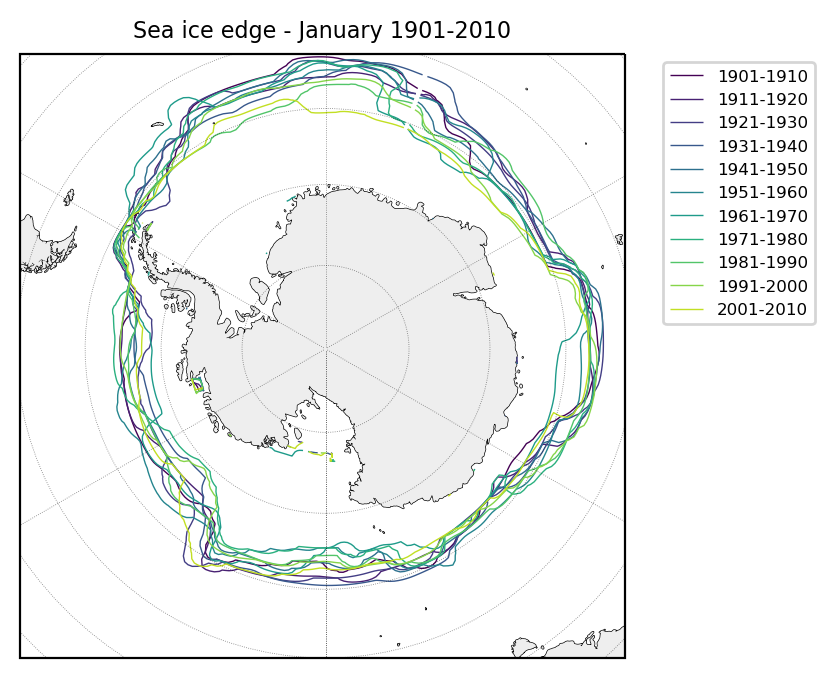

In [11]:
from matplotlib import cm
import matplotlib

cmap = matplotlib.cm.get_cmap('viridis')

lines = []
labels = []

fig=plt.figure(dpi=200)
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90, globe=None))
ax.coastlines(resolution='50m',linewidth=0.5)
ax.set_extent([-180,180,-50,-90],crs=ccrs.PlateCarree()) 
ax.gridlines(linewidth=0.3, color='k', alpha=0.5, linestyle=':')

for i in range(11):
    yr = str(1901+i*10)
    yr2 = str(1900+10+i*10)
    data = hist.sel(time=slice(yr+"-01",yr2+"-01"))
    data["siconc"].groupby('time.month').mean('time')
    rgba = cmap(i/11)
    contour = plt.contour(x, y, data.siconc[0,:,:], levels=[0.15], colors=[rgba], linewidths=0.5, transform=ccrs.PlateCarree())
    
    lines.extend(contour.collections)
    labels.extend([yr+'-'+yr2])
    
plt.legend(lines, labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=6)
ax.add_feature(land_50m, facecolor='#eeeeee')
plt.title('Sea ice edge - January 1901-2010',fontsize=8)

### **UKESM projections sea ice edge (2015-2100)**

In [6]:
data_directory_09 = '/gws/pw/j05/cop26_hackathons/bristol/project09/data/'

project = xr.load_dataset(data_directory_09+'ETOPO_siconc_SImon_UKESM1-0-LL_ssp585_r1i1p1f2_201501-210012.nc')

x,y = np.meshgrid(project.ETOPO60X, project.ETOPO60Y)

2021-2030
2031-2040
2041-2050
2051-2060
2061-2070
2071-2080
2081-2090
2091-2100


Text(0.5, 1.0, 'Sea ice edge - January 2020-2100')

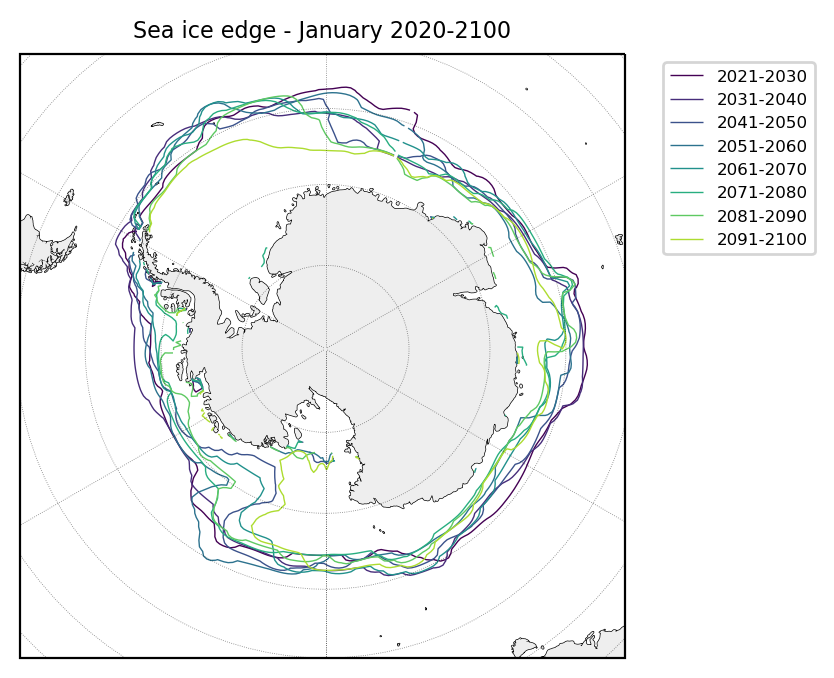

In [7]:
from matplotlib import cm
import matplotlib

cmap = matplotlib.cm.get_cmap('viridis')

lines = []
labels = []

fig=plt.figure(dpi=200)
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90, globe=None))
ax.coastlines(resolution='50m',linewidth=0.5)
ax.set_extent([-180,180,-50,-90],crs=ccrs.PlateCarree()) 
ax.gridlines(linewidth=0.3, color='k', alpha=0.5, linestyle=':')

for i in range(8):
    yr = str(2021+i*10)
    yr2 = str(2020+10+i*10)
    print(yr+'-'+yr2)
    data = project.sel(time=slice(yr+"-01",yr2+"-01"))
    data["siconc"].groupby('time.month').mean('time')
    rgba = cmap(i/8)
    contour = plt.contour(x, y, data.siconc[0,:,:], levels=[0.15], colors=[rgba], linewidths=0.5, transform=ccrs.PlateCarree())
    
    lines.extend(contour.collections)
    labels.extend([yr+'-'+yr2])
    
plt.legend(lines, labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=6)
ax.add_feature(land_50m, facecolor='#eeeeee')
plt.title('Sea ice edge - January 2020-2100',fontsize=8)

### **Combine historical and projections**

Combine historical and projections for decade 2011-2020

In [21]:
data = hist.sel(time=slice("2011-01","2014-01"))
data_proj = project.sel(time=slice("2015-01","2020-01"))

data_comb = xr.concat([data, data_proj], "time")


2021-2030
2031-2040
2041-2050
2051-2060
2061-2070
2071-2080
2081-2090
2091-2100


Text(0.5, 1.0, 'Sea ice edge - January 1901-2100')

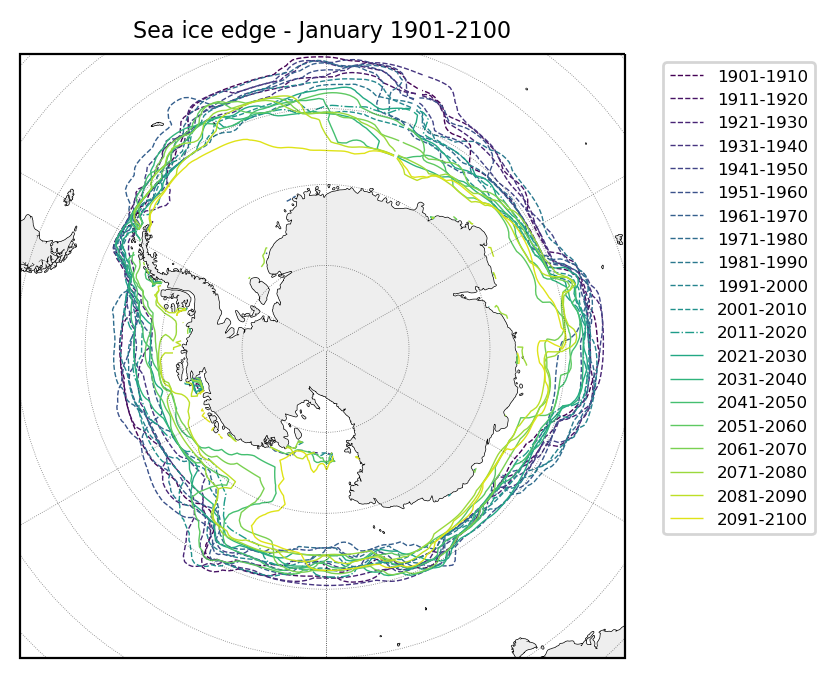

In [26]:
cmap = matplotlib.cm.get_cmap('viridis')

lines = []
labels = []

fig=plt.figure(dpi=200)
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90, globe=None))
ax.coastlines(resolution='50m',linewidth=0.5)
ax.set_extent([-180,180,-50,-90],crs=ccrs.PlateCarree()) 
ax.gridlines(linewidth=0.3, color='k', alpha=0.5, linestyle=':')

#Plot historical ice edge (1901-2010)
for i in range(11):
    yr = str(1901+i*10)
    yr2 = str(1900+10+i*10)
    data = hist.sel(time=slice(yr+"-01",yr2+"-01"))
    data["siconc"].groupby('time.month').mean('time')
    rgba = cmap((i)/20)
    contour = plt.contour(x, y, data.siconc[0,:,:], levels=[0.15], colors=[rgba], linestyles='--', linewidths=0.5, transform=ccrs.PlateCarree())
    
    lines.extend(contour.collections)
    labels.extend([yr+'-'+yr2])

#Plot 2011-2020
yr = str(2011)
yr2 = str(2020)
data_comb["siconc"].groupby('time.month').mean('time')
rgba = cmap((11)/20)
contour = plt.contour(x, y, data_comb.siconc[0,:,:], levels=[0.15], colors=[rgba], linestyles='-.', linewidths=0.5, transform=ccrs.PlateCarree())
    
lines.extend(contour.collections)
labels.extend([yr+'-'+yr2])

#Plot projections (2021-2100)    
for i in range(8):
    yr = str(2021+i*10)
    yr2 = str(2020+10+i*10)
    print(yr+'-'+yr2)
    data = project.sel(time=slice(yr+"-01",yr2+"-01"))
    data["siconc"].groupby('time.month').mean('time')
    rgba = cmap((i+12)/20)
    contour = plt.contour(x, y, data.siconc[0,:,:], levels=[0.15], colors=[rgba], linewidths=0.5, transform=ccrs.PlateCarree())
    
    lines.extend(contour.collections)
    labels.extend([yr+'-'+yr2])
    
plt.legend(lines, labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=6)
ax.add_feature(land_50m, facecolor='#eeeeee')
plt.title('Sea ice edge - January 1901-2100',fontsize=8)